<a href="https://colab.research.google.com/github/jvaug30/Leadership-Attributes/blob/main/Leadership_Attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00 Data/02 Stack Two/Week 08/Copy of GLOBE-Phase-2-Aggregated-Leadership-Data.csv')
df.head()

,Country,Country Name,Performance Oriented,Autocratic,Modesty,Charismatic 3: Self-sacrifice,Team 1: Collaborative Team Orientation,Decisive,Diplomatic,Face-saver,...,Team 2: Team Integrator,"Internally Competitive, Originally Labeled _Conflict Inducer_",Participative,Charismatic/Value-based Global Leadership Dimension,Team-Oriented Global Leadership Dimension,Self-Protective Global Leadership Dimension,Participative Global Leadership Dimension,Humane-Oriented Global Leadership Dimension,Autonomous Global Leadership Dimension,Country Cluster
0,2,England,6.38,2.55,4.91,4.90,5.33,6.00,5.40,2.54,...,6.16,3.42,5.68,6.01,5.71,3.04,5.57,4.90,3.92,Anglo
1,3,Costa Rica,6.15,2.46,5.48,5.67,5.74,5.66,5.14,2.72,...,6.05,4.17,5.53,5.95,5.81,3.55,5.54,4.99,3.46,Latin America
2,5,Italy,6.18,2.64,4.67,5.20,5.53,6.09,5.70,2.60,...,6.14,3.67,5.57,5.98,5.87,3.25,5.47,4.38,3.62,Latin Europe
3,6,India,5.96,3.10,5.33,5.45,5.51,5.83,5.70,3.57,...,5.83,4.24,5.07,5.85,5.72,3.77,4.99,5.26,3.85,Southern Asia
4,7,Namibia,6.16,2.58,5.10,4.79,5.46,6.16,5.42,2.48,...,6.05,3.83,5.53,5.99,5.81,3.36,5.48,5.10,3.77,Sub-Sahara Africa


In [ ]:
df.drop(columns='Country', inplace=True)
df.head()

,Country Name,Performance Oriented,Autocratic,Modesty,Charismatic 3: Self-sacrifice,Team 1: Collaborative Team Orientation,Decisive,Diplomatic,Face-saver,Charismatic 1: Visionary,...,Team 2: Team Integrator,"Internally Competitive, Originally Labeled _Conflict Inducer_",Participative,Charismatic/Value-based Global Leadership Dimension,Team-Oriented Global Leadership Dimension,Self-Protective Global Leadership Dimension,Participative Global Leadership Dimension,Humane-Oriented Global Leadership Dimension,Autonomous Global Leadership Dimension,Country Cluster
0,England,6.38,2.55,4.91,4.90,5.33,6.00,5.40,2.54,6.21,...,6.16,3.42,5.68,6.01,5.71,3.04,5.57,4.90,3.92,Anglo
1,Costa Rica,6.15,2.46,5.48,5.67,5.74,5.66,5.14,2.72,6.06,...,6.05,4.17,5.53,5.95,5.81,3.55,5.54,4.99,3.46,Latin America
2,Italy,6.18,2.64,4.67,5.20,5.53,6.09,5.70,2.60,6.24,...,6.14,3.67,5.57,5.98,5.87,3.25,5.47,4.38,3.62,Latin Europe
3,India,5.96,3.10,5.33,5.45,5.51,5.83,5.70,3.57,6.02,...,5.83,4.24,5.07,5.85,5.72,3.77,4.99,5.26,3.85,Southern Asia
4,Namibia,6.16,2.58,5.10,4.79,5.46,6.16,5.42,2.48,6.16,...,6.05,3.83,5.53,5.99,5.81,3.36,5.48,5.10,3.77,Sub-Sahara Africa


In [ ]:
df.duplicated().sum()

0

Zero duplicates found.

In [ ]:
df['Country Name'].unique()

array(['England', 'Costa Rica', 'Italy', 'India', 'Namibia',
       'Czech Republic', 'Venezuela', 'Taiwan', 'Singapore', 'Hong Kong',
       'Ecuador', 'Iran', 'Mexico', 'El Salvador', 'Israel', 'Hungary',
       'Russia', 'Zambia', 'Indonesia', 'Kazakhstan', 'Zimbabwe', 'Qatar',
       'South Korea', 'Morocco', 'Portugal', 'China', 'Japan', 'Colombia',
       'Albania', 'Turkey', 'Finland', 'Poland', 'Egypt', 'Spain',
       'South Africa (Black Sample)', 'Guatemala', 'Ireland', 'Bolivia',
       'Austria', 'Switzerland', 'Netherlands', 'France',
       'French Switzerland', 'Australia', 'Greece', 'Sweden',
       'South Africa (White Sample)', 'Canada (English-speaking)',
       'Brazil', 'Kuwait', 'Philippines', 'Argentina', 'Nigeria',
       'New Zealand', 'Slovenia', 'Malaysia', 'Germany (EAST)',
       'Germany (WEST)', 'Denmark', 'Georgia', 'Thailand', 'USA'],
      dtype=object)

Country Name does not have inconsistencies in the categorical data.

In [ ]:
df.isna().any()

Country Name                                                     False
Performance Oriented                                             False
Autocratic                                                       False
Modesty                                                          False
Charismatic 3: Self-sacrifice                                    False
Team 1: Collaborative Team Orientation                           False
Decisive                                                         False
Diplomatic                                                       False
Face-saver                                                       False
Charismatic 1: Visionary                                         False
Humane-oriented                                                  False
Integrity                                                        False
Bureaucratic, Originally Labeled _Procedural_                    False
Administratively Competent                                       False
Self-c

In [ ]:
df['Country Cluster'].isna().sum()

1

One 'nan' value located in column Country Cluster.

Nan value coincides with Czech Republic. This is an Eastern Europe country. Value will be changed to fill the nan value.

In [ ]:
df['Country Cluster'].unique()

array(['Anglo', 'Latin America', 'Latin Europe', 'Southern Asia',
       'Sub-Sahara Africa ', nan, 'Confucian Asia', 'Middle East',
       'Latin America ', 'Eastern Europe', 'Nordic Europe',
       'Germanic Europe'], dtype=object)

In [ ]:
df['Country Cluster'] = df['Country Cluster'].fillna('Eastern Europe')
df['Country Cluster'].unique()

array(['Anglo', 'Latin America', 'Latin Europe', 'Southern Asia',
       'Sub-Sahara Africa ', 'Eastern Europe', 'Confucian Asia',
       'Middle East', 'Latin America ', 'Nordic Europe',
       'Germanic Europe'], dtype=object)

In [ ]:
df['Country Cluster'].isna().sum()

0

In [ ]:
df.describe()

,Performance Oriented,Autocratic,Modesty,Charismatic 3: Self-sacrifice,Team 1: Collaborative Team Orientation,Decisive,Diplomatic,Face-saver,Charismatic 1: Visionary,Humane-oriented,...,Malevolent,Team 2: Team Integrator,"Internally Competitive, Originally Labeled _Conflict Inducer_",Participative,Charismatic/Value-based Global Leadership Dimension,Team-Oriented Global Leadership Dimension,Self-Protective Global Leadership Dimension,Participative Global Leadership Dimension,Humane-Oriented Global Leadership Dimension,Autonomous Global Leadership Dimension
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,6.019194,2.645161,4.991774,5.010806,5.467258,5.787581,5.493710,2.935161,6.019516,4.77000,...,1.797258,5.869839,3.987903,5.325323,5.829194,5.761452,3.463065,5.341774,4.881613,3.861774
std,0.366496,0.465406,0.401789,0.415492,0.317641,0.441709,0.294609,0.574444,0.353277,0.48962,...,0.275099,0.399112,0.474943,0.437094,0.328545,0.257203,0.423346,0.412583,0.394728,0.441657
min,4.510000,1.890000,4.140000,3.980000,4.420000,3.620000,4.490000,2.050000,4.620000,3.29000,...,1.330000,4.100000,3.090000,4.390000,4.510000,4.740000,2.550000,4.500000,3.820000,2.270000
25%,5.912500,2.312500,4.712500,4.802500,5.280000,5.637500,5.280000,2.480000,5.895000,4.44250,...,1.602500,5.670000,3.647500,5.025000,5.697500,5.635000,3.160000,5.040000,4.660000,3.532500
50%,6.085000,2.615000,5.035000,5.020000,5.505000,5.855000,5.555000,2.800000,6.105000,4.78500,...,1.755000,5.995000,3.970000,5.385000,5.905000,5.805000,3.470000,5.360000,4.880000,3.865000
75%,6.217500,2.955000,5.327500,5.207500,5.687500,6.045000,5.697500,3.327500,6.230000,5.10750,...,1.895000,6.155000,4.340000,5.612500,6.000000,5.917500,3.750000,5.635000,5.187500,4.175000
max,6.640000,3.860000,5.860000,5.990000,6.090000,6.370000,6.050000,4.630000,6.500000,5.68000,...,2.670000,6.430000,5.010000,6.140000,6.460000,6.210000,4.620000,6.090000,5.750000,4.650000


Summary of numerical data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country Name                                                   62 non-null     object 
 1   Performance Oriented                                           62 non-null     float64
 2   Autocratic                                                     62 non-null     float64
 3   Modesty                                                        62 non-null     float64
 4   Charismatic 3: Self-sacrifice                                  62 non-null     float64
 5   Team 1: Collaborative Team Orientation                         62 non-null     float64
 6   Decisive                                                       62 non-null     float64
 7   Diplomatic                                                     6

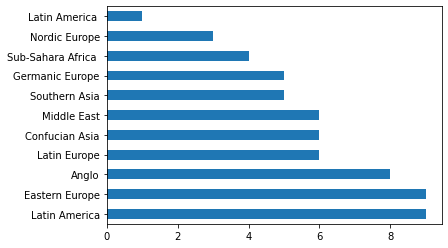

In [ ]:
df['Country Cluster'].value_counts().plot(kind='barh');

Horizontal bar chart shows the count of Country Clusters represented by a respective country.

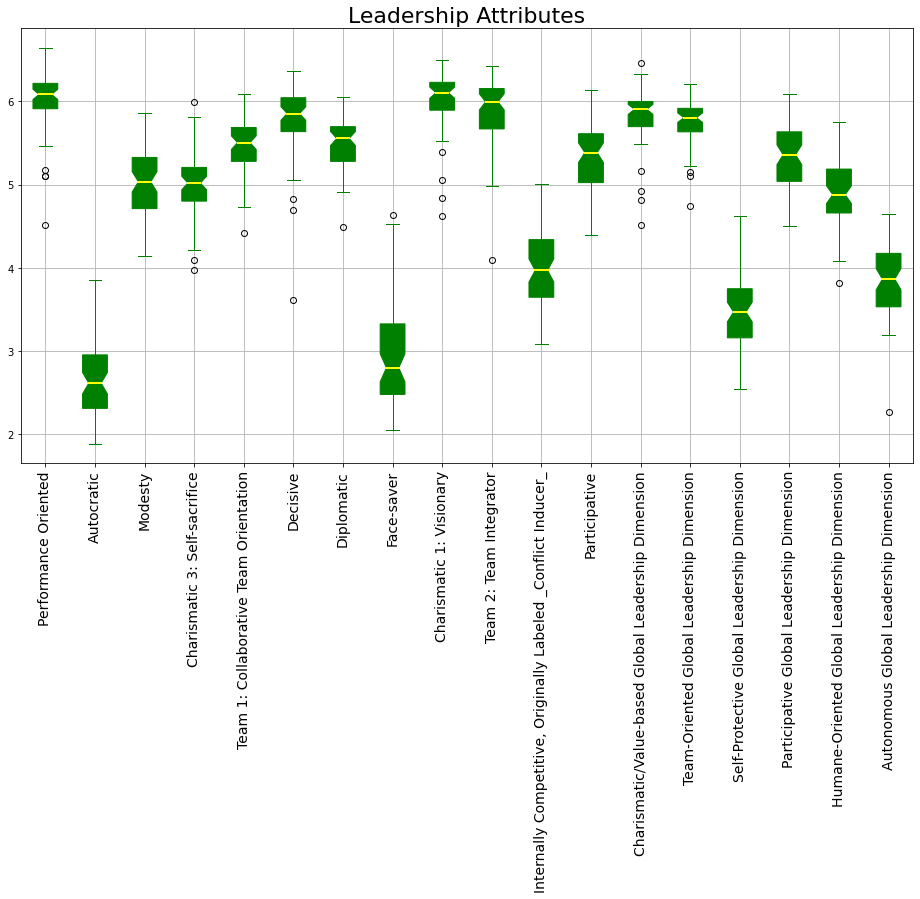

In [ ]:
plt.figure(figsize=(16,8))
df.boxplot(column=['Performance Oriented',
                   'Autocratic',
                   'Modesty',
                   'Charismatic 3: Self-sacrifice',
                   'Team 1: Collaborative Team Orientation',
                   'Decisive',
                   'Diplomatic',
                   'Face-saver',
                   'Charismatic 1: Visionary',
                   'Team 2: Team Integrator',
                   'Internally Competitive, Originally Labeled _Conflict Inducer_',
                   'Participative',
                   'Charismatic/Value-based Global Leadership Dimension',
                   'Team-Oriented Global Leadership Dimension',
                   'Self-Protective Global Leadership Dimension',
                   'Participative Global Leadership Dimension',
                   'Humane-Oriented Global Leadership Dimension',
                   'Autonomous Global Leadership Dimension'],
           notch=True,
           patch_artist=True,
           color='Green',
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'));
plt.xticks(rotation=90, fontsize=14);
plt.title('Leadership Attributes', fontsize=22);

Box plot of Leadership Attributes shows significant outliers.

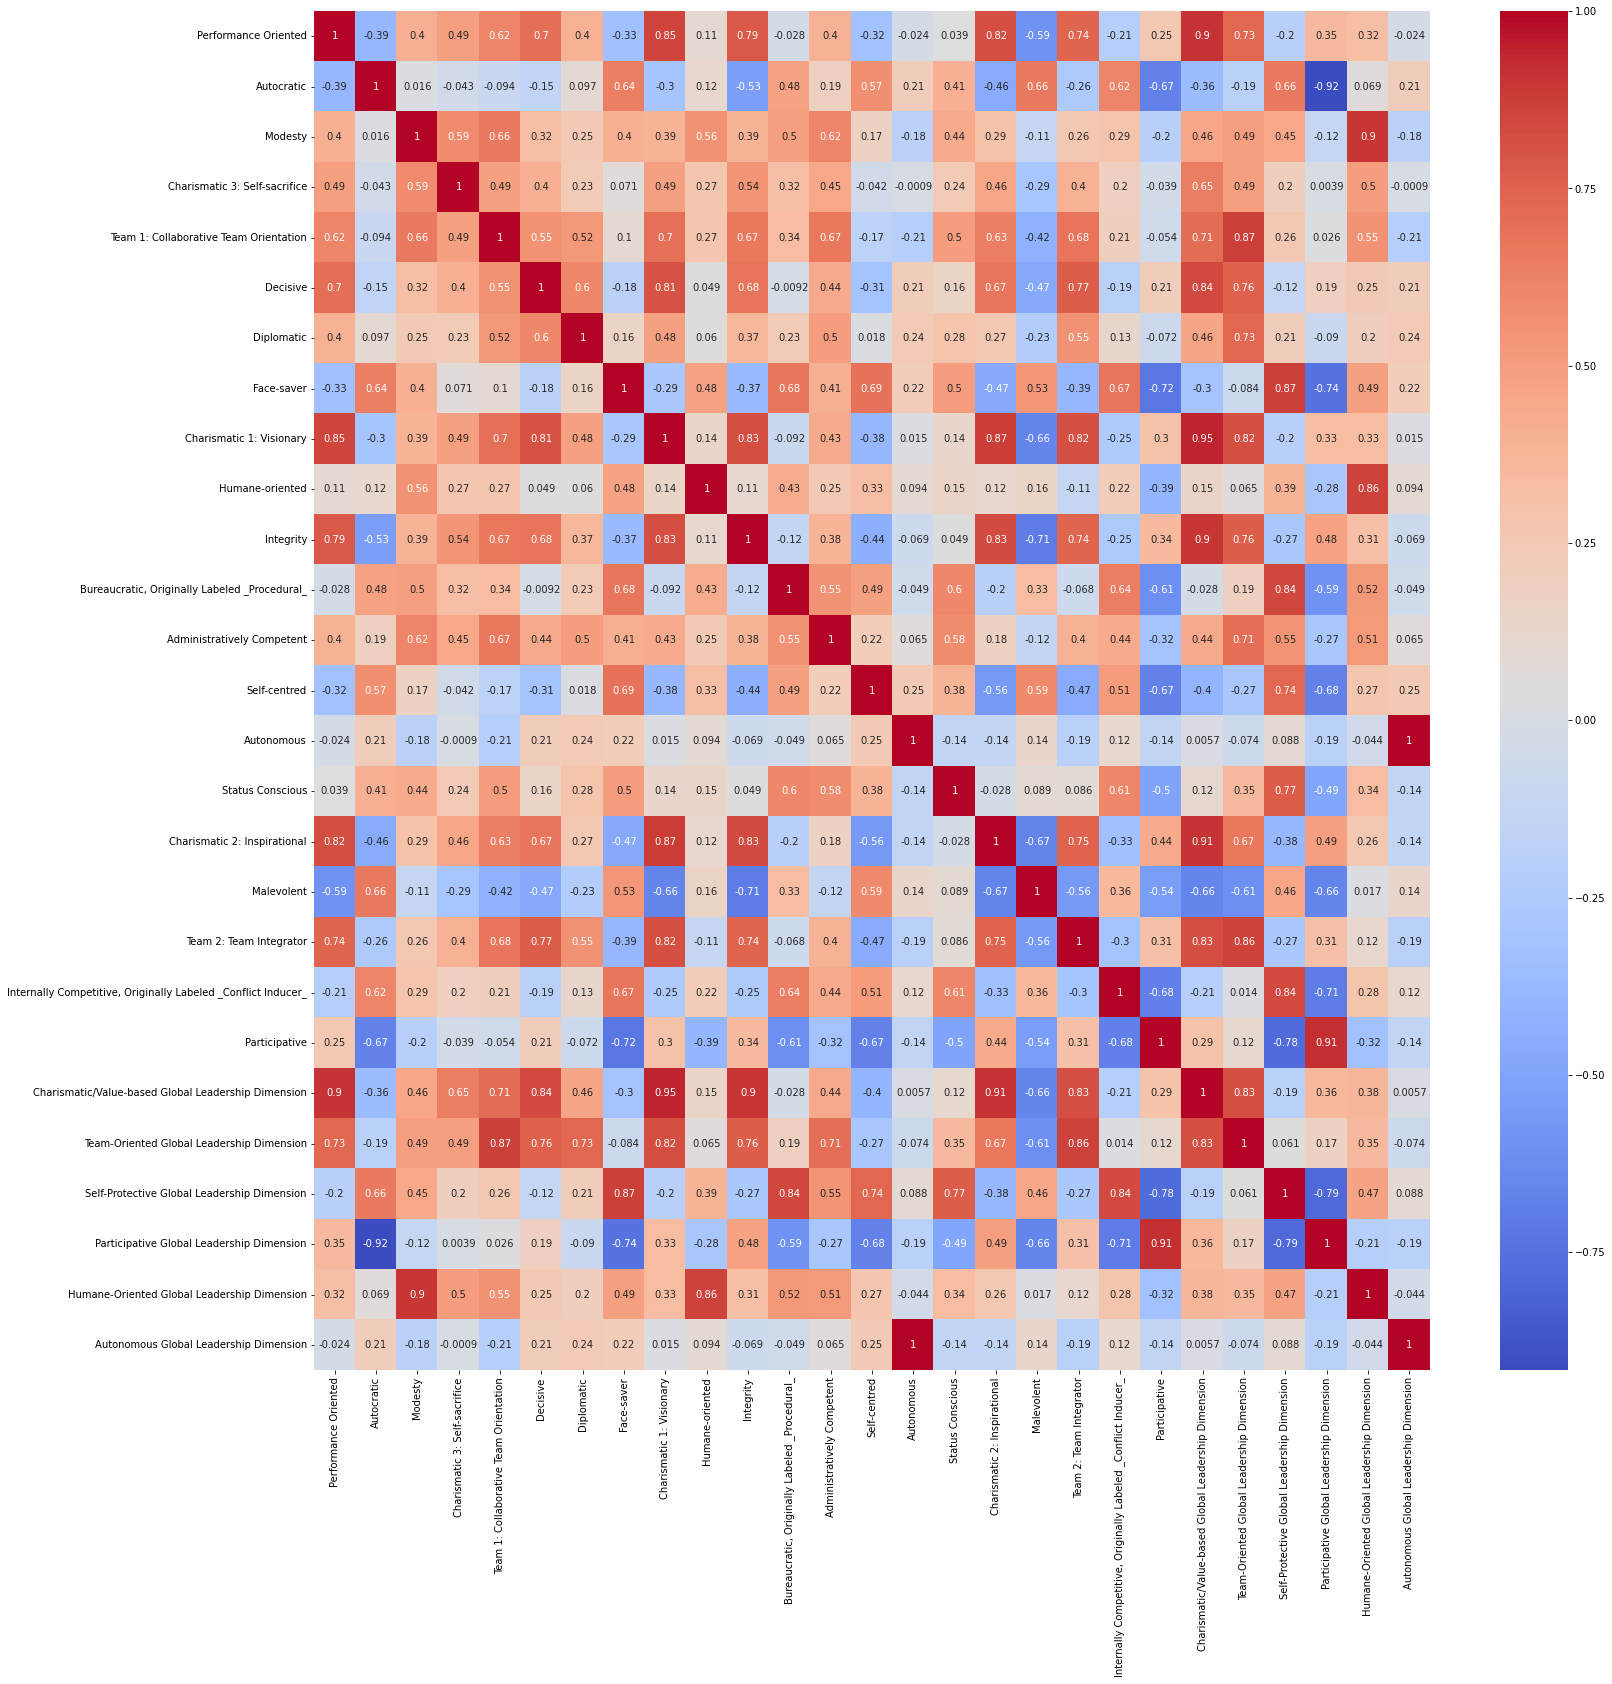

In [ ]:
corr = df.drop(columns=['Country Name', 'Country Cluster']).corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cmap='coolwarm', annot=True);

Heatmap displays moderate and/or strong correlations between Leadership Attributes (features).

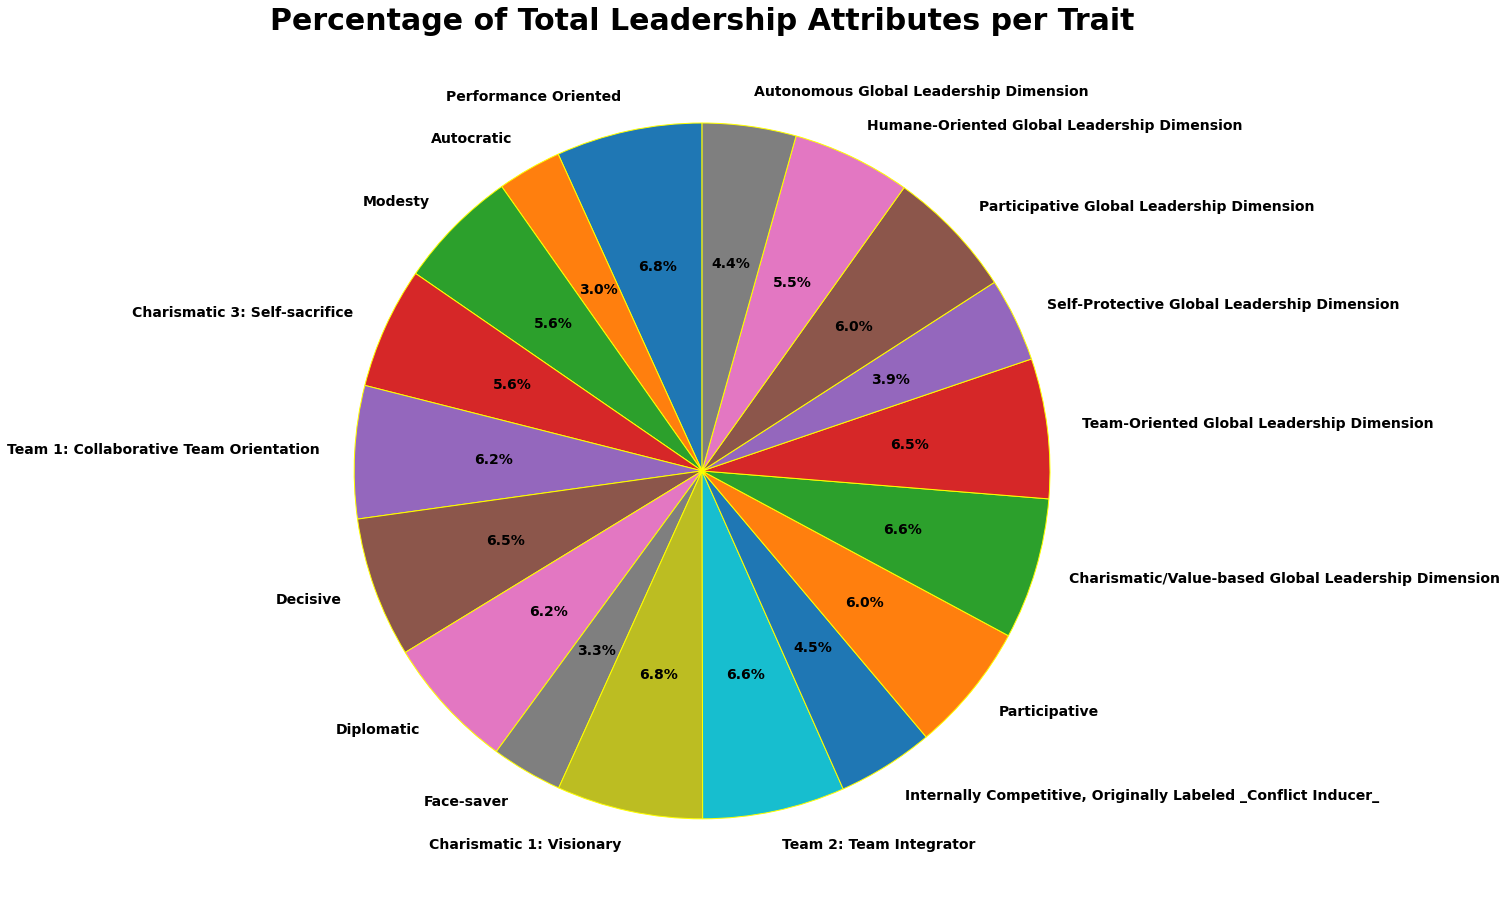

In [ ]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/
df_Total_Score_Performance_Oriented = df['Performance Oriented'].sum()
df_Total_Score_Autocratic = df['Autocratic'].sum()
df_Total_Score_Modesty = df['Modesty'].sum()
df_Total_Score_Self_Sacrifice = df['Charismatic 3: Self-sacrifice'].sum()
df_Total_Score_Team_1 = df['Team 1: Collaborative Team Orientation'].sum()
df_Total_Score_Decisive = df['Decisive'].sum()
df_Total_Score_Diplomatic = df['Diplomatic'].sum()
df_Total_Score_Face_Saver = df['Face-saver'].sum()
df_Total_Score_Visionary = df['Charismatic 1: Visionary'].sum()
df_Total_Score_Team_2 = df['Team 2: Team Integrator'].sum()
df_Total_Score_Conflict_Inducer = df['Internally Competitive, Originally Labeled _Conflict Inducer_'].sum()
df_Total_Score_Participative = df['Participative'].sum()
df_Total_Score_VGLD = df['Charismatic/Value-based Global Leadership Dimension'].sum()
df_Total_Score_TOGLD = df['Team-Oriented Global Leadership Dimension'].sum()
df_Total_Score_SPGLD = df['Self-Protective Global Leadership Dimension'].sum()
df_Total_Score_PGLD = df['Participative Global Leadership Dimension'].sum()
df_Total_Score_HOGLD = df['Humane-Oriented Global Leadership Dimension'].sum()
df_Total_Score_AGLD = df['Autonomous Global Leadership Dimension'].sum()

df_Total_Score_Attributes = df_Total_Score_Performance_Oriented + df_Total_Score_Autocratic + df_Total_Score_Modesty + df_Total_Score_Self_Sacrifice + df_Total_Score_Team_1 + df_Total_Score_Decisive + df_Total_Score_Diplomatic + df_Total_Score_Face_Saver + df_Total_Score_Visionary + df_Total_Score_Team_2 + df_Total_Score_Conflict_Inducer + df_Total_Score_Participative + df_Total_Score_VGLD + df_Total_Score_TOGLD + df_Total_Score_SPGLD + df_Total_Score_PGLD + df_Total_Score_HOGLD + df_Total_Score_AGLD

df_Attributes = ['Performance Oriented', 'Autocratic', 'Modesty', 'Charismatic 3: Self-sacrifice', 'Team 1: Collaborative Team Orientation', 'Decisive', 'Diplomatic', 'Face-saver', 'Charismatic 1: Visionary', 'Team 2: Team Integrator', 'Internally Competitive, Originally Labeled _Conflict Inducer_', 'Participative', 'Charismatic/Value-based Global Leadership Dimension', 'Team-Oriented Global Leadership Dimension', 'Self-Protective Global Leadership Dimension', 'Participative Global Leadership Dimension', 'Humane-Oriented Global Leadership Dimension', 'Autonomous Global Leadership Dimension']
pct = df_Total_Score_Performance_Oriented/df_Total_Score_Attributes, df_Total_Score_Autocratic/df_Total_Score_Attributes, df_Total_Score_Modesty/df_Total_Score_Attributes, df_Total_Score_Self_Sacrifice/df_Total_Score_Attributes, df_Total_Score_Team_1/df_Total_Score_Attributes, df_Total_Score_Decisive/df_Total_Score_Attributes, df_Total_Score_Diplomatic/df_Total_Score_Attributes, df_Total_Score_Face_Saver/df_Total_Score_Attributes, df_Total_Score_Visionary/df_Total_Score_Attributes, df_Total_Score_Team_2/df_Total_Score_Attributes, df_Total_Score_Conflict_Inducer/df_Total_Score_Attributes, df_Total_Score_Participative/df_Total_Score_Attributes, df_Total_Score_VGLD/df_Total_Score_Attributes, df_Total_Score_TOGLD/df_Total_Score_Attributes, df_Total_Score_SPGLD/df_Total_Score_Attributes, df_Total_Score_PGLD/df_Total_Score_Attributes, df_Total_Score_HOGLD/df_Total_Score_Attributes, df_Total_Score_AGLD/df_Total_Score_Attributes

pct
wp = {'linewidth' : 1, 'edgecolor' : 'yellow',}
def func(pct):
  absolute = int(pct)
  return '{:.1f}%'.format(pct, absolute)
fig, axes = plt.subplots(figsize=(20,16))
axes.pie(pct,
         autopct = lambda pct: func(pct),
         labels = df_Attributes,
         shadow = False,
         startangle=90,
         wedgeprops = wp,
         textprops = dict(color ='k', weight= 'bold', fontsize=14));
axes.set_title('Percentage of Total Leadership Attributes per Trait', weight = 'bold', fontsize = 30);

In [ ]:
plot_bar_positive = pd.melt(df, id_vars=['Country Cluster'], value_vars = ['Performance Oriented', 'Modesty', 'Decisive', 'Diplomatic', 'Participative'],
                   var_name = 'Leadership Attributes', value_name='Attribute Scores')

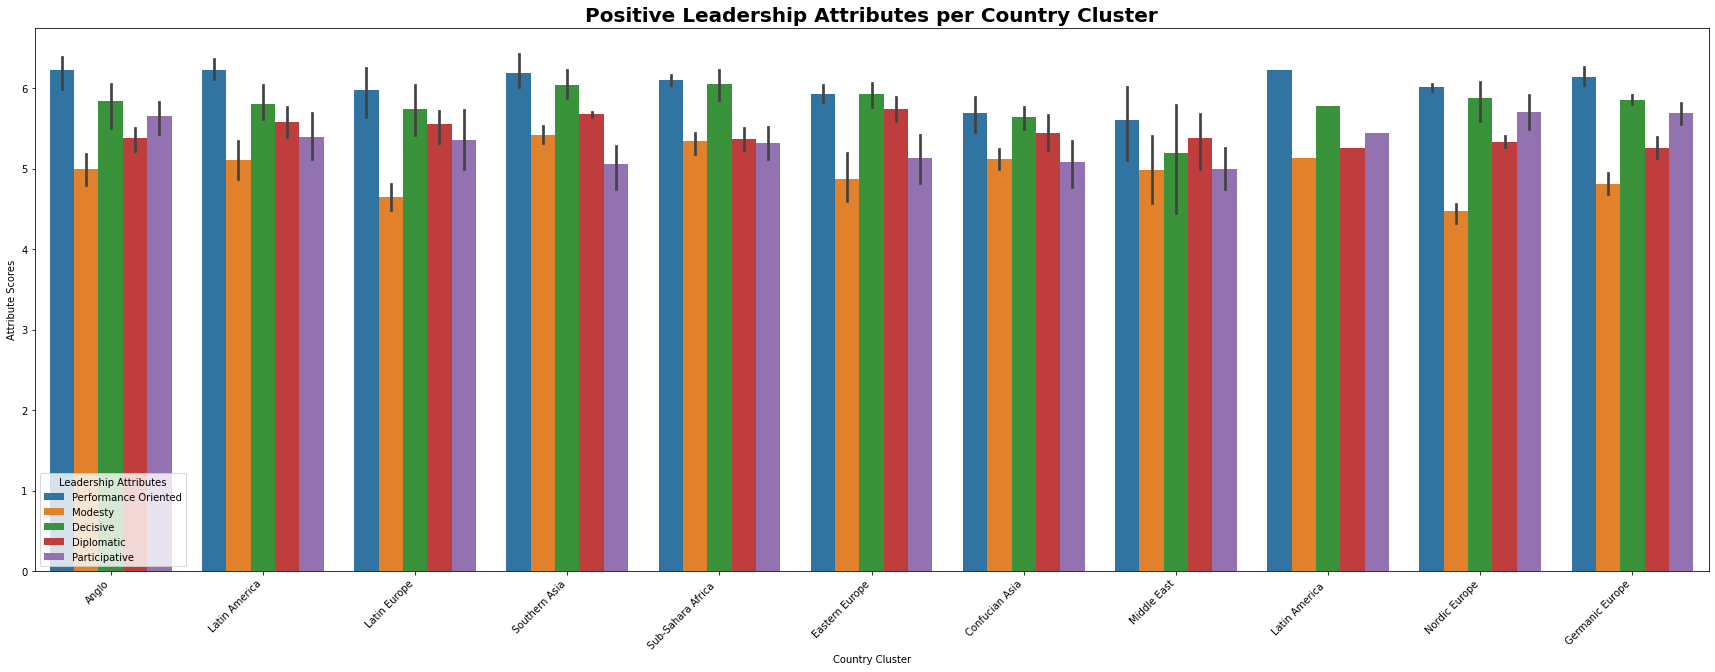

In [ ]:
plt.figure(figsize=(30,10))
axes = sns.barplot(data=plot_bar_positive, x = 'Country Cluster', y='Attribute Scores', hue='Leadership Attributes')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_title('Positive Leadership Attributes per Country Cluster', weight='bold', fontsize=20);

In [ ]:
plot_bar_negative = pd.melt(df, id_vars=['Country Cluster'], value_vars = ['Autocratic', 'Internally Competitive, Originally Labeled _Conflict Inducer_'],
                   var_name = 'Leadership Attributes', value_name='Attribute Scores')

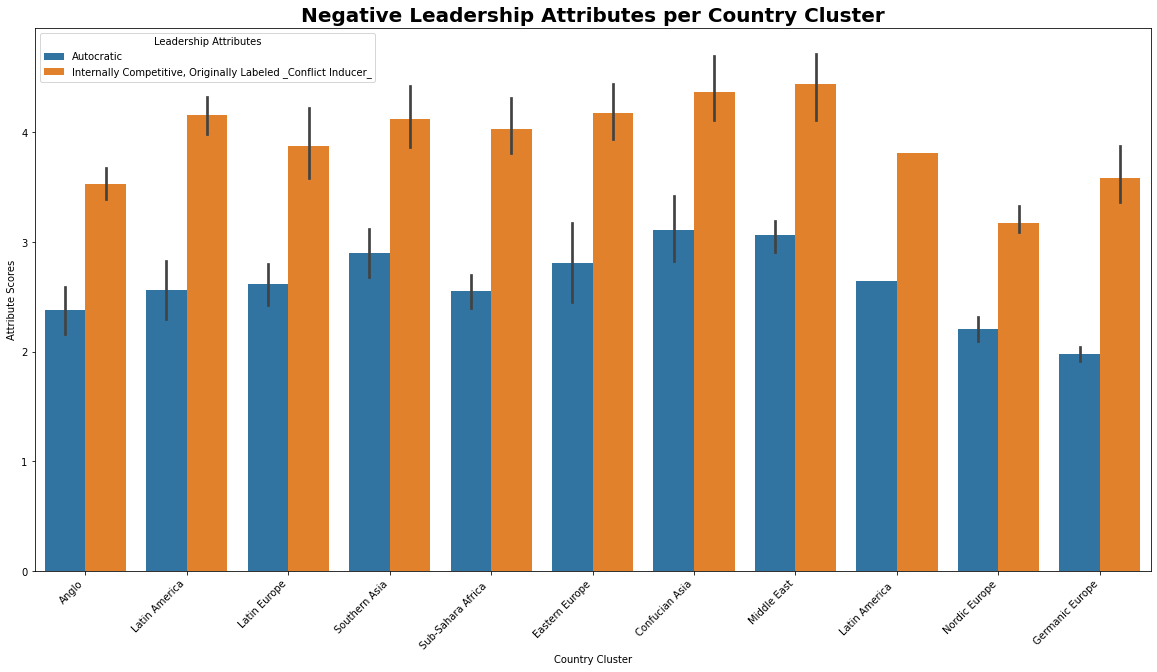

In [ ]:
plt.figure(figsize=(20,10))
axes = sns.barplot(data=plot_bar_negative, x = 'Country Cluster', y='Attribute Scores', hue='Leadership Attributes')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_title('Negative Leadership Attributes per Country Cluster', weight='bold', fontsize=20);

In [ ]:
plot_bar_global = pd.melt(df, id_vars=['Country Cluster'], value_vars = ['Charismatic/Value-based Global Leadership Dimension', 'Team-Oriented Global Leadership Dimension', 'Self-Protective Global Leadership Dimension',
                                                                         'Participative Global Leadership Dimension', 'Humane-Oriented Global Leadership Dimension', 'Autonomous Global Leadership Dimension'],
                          var_name = 'Leadership Attributes', value_name='Attribute Scores')

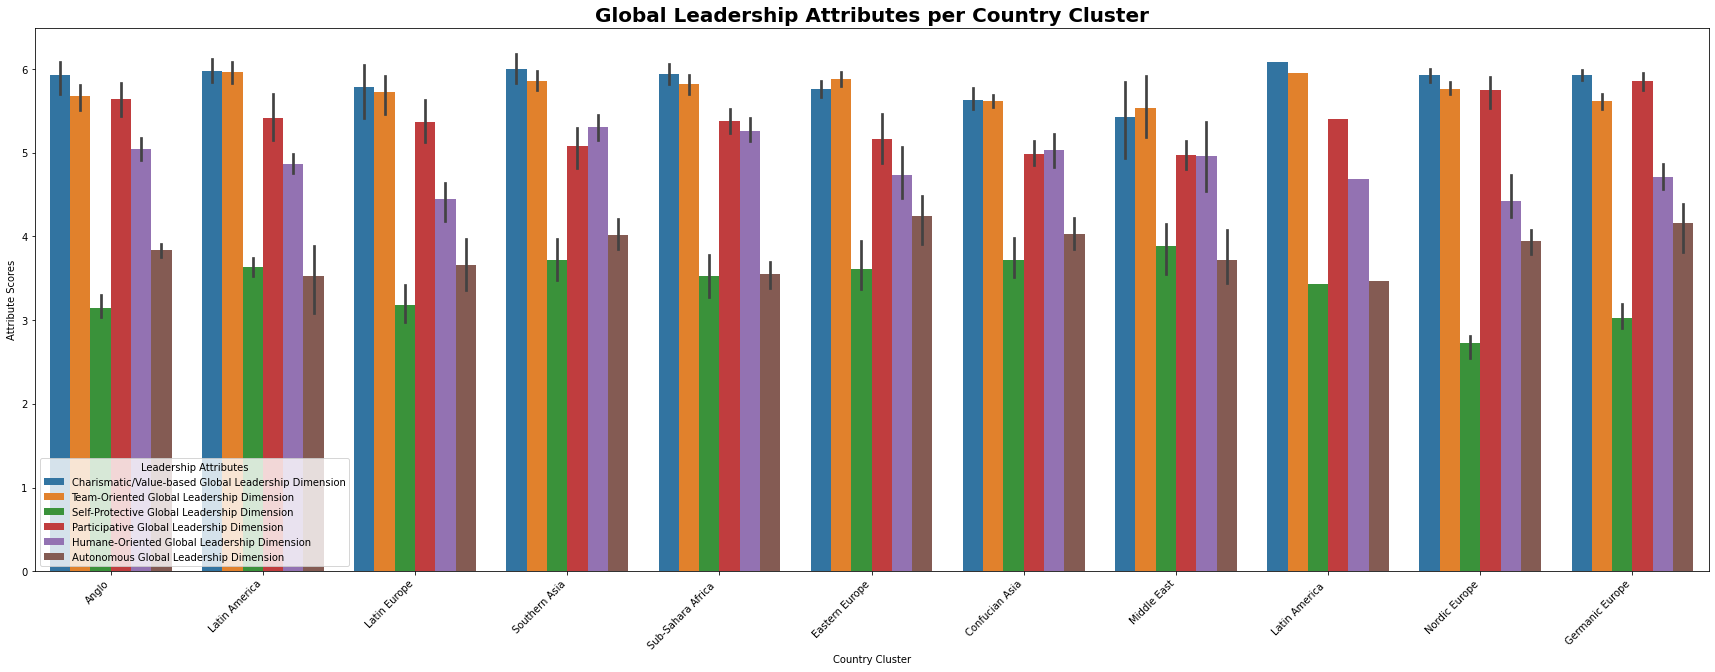

In [ ]:
plt.figure(figsize=(30,10))
axes = sns.barplot(data=plot_bar_global, x = 'Country Cluster', y='Attribute Scores', hue='Leadership Attributes')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_title('Global Leadership Attributes per Country Cluster', weight='bold', fontsize=20);